### Nonparametric Regression 

#### Nonparametric Regression:

What is a nonparametric model?

- unlike linear regression, a nonparamtric model does not assume the conditional mean of y as a linear function of x; in fact, it does not assume any particular functional form to describe the relationship between $\mathbb{E}(y)$ and $x$  

for example, for the nonparametric model, we can write down the conditional mean of y as the following
$$
\mathbb{E}[Y_i|X_i = x] = g_o(x)
$$
where $g_0$ is a twice differentiable function;   
as opposed to 
the linear regression model, where we have  
$$
\mathbb{E}[Y_i|X_i = x] = x'\beta
$$  

--------------------------------------------------------------------------------

How can we express this nonparametric model as a regression equation?  

- $$ 
Y_i = g(X_i) + u_i, \   \mathbb{E}[u_i|X_i] = 0
$$  

-------------------------------------------------------------

Why would we prefer using nonparametric regression instead of linear least square regression? 

- because the nonparametric approach does not restrict the conditional expectation function to be linear  

---------------------------------------


How about an demonstration of using nonparametric regression?

- Yes, a classic example is by regression discontinuity design.  

-----------------------------------

#### Regression Discontinuity Design: 

What is this regression discontinuity design?

- it estimates a causal treatment effect when treatment is given to part of the population whose some variable $X_i$ is greater than a threshold $\bar{x}$, while the condition mean is still a smooth function of X.

----------------------------------


Why do we want to have this set-up?

- the idea is that "any discontinuities in the outcome at the boundary should be attributed to the treatment", as it is the only thing that varies at that point. (p9)

------------------

What will be model under regression discontinuity design look like?

- $$
Y_i = \mathbb{1}\{X_i > \bar{x}\}\beta + g(X_i) + \epsilon_i
$$  
where g( . ) is an unknown continous function 

-------------------------


How to estimate the treatment effect that we are interested?

- $$
\beta = \mu(\bar{(x)}_{Y}^+ - \mu(\bar{(x)}_{Y}^-
$$

where

$$
\mu(\bar{x}_{Y}^+) := lim_{h->0}\mathbb{E}[Y_i|\bar{x} < X_i < \bar{x} + h]
$$  
is conditional expectation of $Y$ on $X_i$ being above and infinitely close to threshold  $\bar{x}$  

and 

$$
\mu(\bar{x}_{Y}^- ):= lim_{h->0}\mathbb{E}[Y_i|\bar{x} - h < X_i < \bar{x}]
$$  
is conditional expectation of $Y$ on $X_i$ being below and infinitely close to threshold  $\bar{x}$  

-------------------------

How should we get the conditional expectation at the discontinuity then? 

- in general, people uses local linear regression at the boundary using a **Gaussian kernel and bandwidth**

----------------


How about an example that uses the regression discontinuity design and the nonparametric regression?

-  let's look at the incumbency effect

--------------------

#### Incumbency Effect: 

What is an "incumbency effect"?

- in political economy of congressional elections, there is an theory that says an incumbent in an given district is more likely to win the next  election

Given the data set **individ_final.dta**, what should the model look like?

- $$
myoutcomenext_i = \alpha + \beta incumbent_i + g(disshare_i) + \mu_i
$$

-------------------

Stata code

```
clear
set mem 120m
set more off
use individ_final

#delimit;

/*step (a), generate variable incumbent = 1 if the candidate won the previous election based on difshare*/

generate incumbent = 1 if difshare > 0;
replace incumbent = 0 if difshare <= 0;
regress myoutcomenext incumbent;


/*step (b), run seperate local linear regression for subsamples difshare > 0 and difshare < 0, respectively using Gaussian kernal and bandwidth (stata command lpoly). Use the option degree(!) for the local linear regression, and at(neg_grid) to estimate the function at the grid of values for difshare generated by the following three lines of code*/

gen share_grid = _n/50-1 in 1/100;
gen pos_grid = share_grid if share_grid >= 0;
gen neg_grid = share_grid if share_grid <= 0;

lpoly myoutcomenext difshare if difshare < 0, degree (1) kernel(gaussian) bwidth(0.05) at(neg_grid) generate(neg_fit);
lpoly myoutcomenext difshare if difshare > 0, degree (1) kernel(gaussian) bwidth(0.05) at(pos_grid) generate(pos_fit);

/*step (c), plot neg_fit, pos_fit on the same graph*/

graph twoway line neg_fit pos_fit share_grid;

#delimit cr
```

-------------------
plotted graph: 

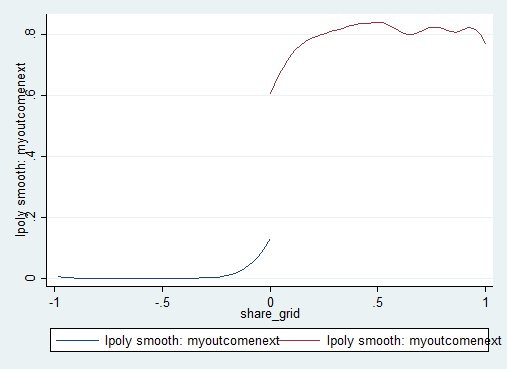

In [2]:
from IPython.display import Image
Image("./local_linear_regression.png")

this gap is the estimated incumbency effect! 

------------------

*Reference: Professor Konrad Menzel(NYU)'s Lecture Notes on Nonparametric Estimation*

https://newclasses.nyu.edu/access/content/group/15a62ccf-c81c-4aed-ad04-4db7274af69a/nonparametrics_notes.pdf